# COVID 19 Forecasts

# Introduction
This project has three student exercises, intended for students new to PySpark and data analytics.
A data scientist should be able to read any article or blog post about big data and apply the technology to their problem at hand.
I took interest in the use of [Facebook's Prophet](https://facebook.github.io/prophet/) for time series forecasting, which is described in this post:
[Fine-Grained Time Series Forecasting at Scale With Facebook Prophet and Apache Spark: Updated for Spark 3](https://databricks.com/blog/2021/04/06/fine-grained-time-series-forecasting-at-scale-with-facebook-prophet-and-apache-spark-updated-for-spark-3.html).
In a prior project, I demonstrated some data manipulations of public COVID 19 data:
* https://www.kaggle.com/datasets/bigquery/covid19-usafacts
* https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/
* https://console.cloud.google.com/marketplace/product/usafacts-public-data/covid19-us-cases

Naturally, I thought it might be fun to apply the Facebook's Prophet forecasting to the COVID 19 data.
The [article](https://databricks.com/blog/2021/04/06/fine-grained-time-series-forecasting-at-scale-with-facebook-prophet-and-apache-spark-updated-for-spark-3.html)
as well as a example [notebook](https://nbviewer.org/github/nicolasfauchereau/Auckland_Cycling/blob/master/notebooks/Auckland_cycling_and_weather.ipynb)
provide a guide to using [Facebook's Prophet](https://facebook.github.io/prophet/).
However, there's still a few steps to make it work for the [COVID 19 data set](https://console.cloud.google.com/marketplace/product/usafacts-public-data/covid19-us-cases).

This project is intended to illustrate to students the common problem of adapting another project’s modeling techniques.
It's not a complete professional project. It's simply a student exercise illustrating a common data scientist task.
Be aware that there's a newer version of [Facebook's Prophet](https://facebook.github.io/prophet/), [Neural Prophet](https://ai.facebook.com/blog/neuralprophet-the-neural-evolution-of-facebooks-prophet):
* https://ai.facebook.com/blog/neuralprophet-the-neural-evolution-of-facebooks-prophet
* https://towardsdatascience.com/how-to-use-facebooks-neuralprophet-and-why-it-s-so-powerful-136652d2da8b

**See the readme.md for more information.**

In [2]:
import os
from tsf.exercise import *

# Running notebooks w/i PyCharm project, set cwd to project root.
folder = os.path.basename(os.getcwd())
if folder != 'tsf':
    os.chdir('../')
    print(f"Working directory {os.getcwd()}")

Working directory D:\Users\robin\OneDrive\Profile\Documents\dev\tsf


# Read the data (locally)

In [3]:
data = create_dataset(local_data=True).cache()
data.show()

22/04/28 15:00:38 INFO: tsf: Getting data from local files.
22/04/28 15:00:45 DEBUG: tsf: Repartitioning data by state.
22/04/28 15:00:46 DEBUG: tsf: Normalizing data.
22/04/28 15:00:51 DEBUG: tsf: Joining case and death data


+-----+----------------+----------+--------------+---------------+-----+------+
|state|county_fips_code|      date|   county_name|state_fips_code|cases|deaths|
+-----+----------------+----------+--------------+---------------+-----+------+
|   NY|           36001|2020-05-29|Albany County |             36| 1834|    99|
|   NY|           36001|2021-08-11|Albany County |             36|25565|   358|
|   NY|           36001|2021-12-10|Albany County |             36|36117|   422|
|   NY|           36001|2021-04-12|Albany County |             36|23323|   342|
|   NY|           36001|2020-07-08|Albany County |             36| 2175|   109|
|   NY|           36001|2021-02-03|Albany County |             36|18938|   301|
|   NY|           36001|2021-05-17|Albany County |             36|24455|   350|
|   NY|           36001|2020-10-07|Albany County |             36| 3233|   123|
|   NY|           36001|2020-03-24|Albany County |             36|  146|     0|
|   NY|           36001|2021-03-15|Alban

### Convert the accumulated data to daily values of changes.

In [4]:
df = cumulative_to_daily(data)
df.show()


+-----+----------------+----------+--------------------+---------------+-----+------+-----------+------------+
|state|county_fips_code|      date|         county_name|state_fips_code|cases|deaths|daily_cases|daily_deaths|
+-----+----------------+----------+--------------------+---------------+-----+------+-----------+------------+
|   NY|           00000|2020-01-22|Statewide Unalloc...|             36|    0|     0|          0|           0|
|   NY|           00000|2020-01-23|Statewide Unalloc...|             36|    0|     0|          0|           0|
|   NY|           00000|2020-01-24|Statewide Unalloc...|             36|    0|     0|          0|           0|
|   NY|           00000|2020-01-25|Statewide Unalloc...|             36|    0|     0|          0|           0|
|   NY|           00000|2020-01-26|Statewide Unalloc...|             36|    0|     0|          0|           0|
|   NY|           00000|2020-01-27|Statewide Unalloc...|             36|    0|     0|          0|           0|
|

### Run forecast on one state, without UDF, to see the results.

22/04/28 15:01:02 INFO: tsf: Getting data from local files.
22/04/28 15:01:05 DEBUG: tsf: Repartitioning data by state.
22/04/28 15:01:06 DEBUG: tsf: Normalizing data.
22/04/28 15:01:11 DEBUG: tsf: Joining case and death data
22/04/28 15:01:16 DEBUG: tsf: Forecasting extra regressor cases for AL
D:\Users\robin\miniconda3\envs\ipy3sp3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Users\robin\miniconda3\envs\ipy3sp3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Users\robin\miniconda3\envs\ipy3sp3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

  state        date  past_mean  forecast_mean  mean_change
0    AL  2022-02-25  23.974714      18.167679    -0.242215


,state,date,past_mean,forecast_mean,mean_change,forecast_fig,metrics_fig
0,AL,2022-02-25,23.974714,18.167679,-0.242215,b'iVBORw0KGgoAAAANSUhEUgAAAtAAAAGwCAYAAACAS1Jb...,b'iVBORw0KGgoAAAANSUhEUgAAAtAAAAGwCAYAAACAS1Jb...


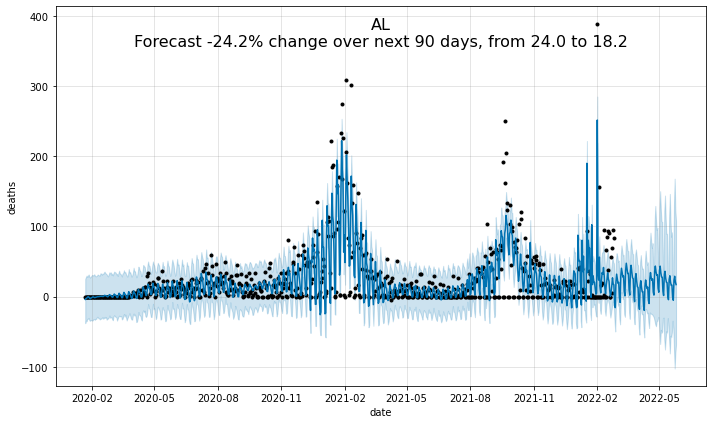

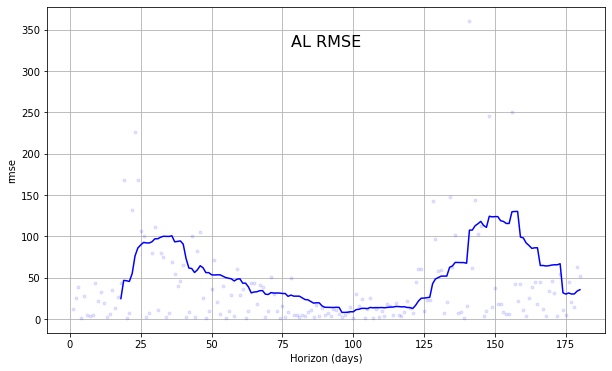

In [5]:
test_one_state(local_data=True)

# TODO Define covid_state_predictions


In [6]:
# TODO Write this based on test_state_forecast and the use of applyInPandas with state_forecast_udf
#  schema=("state string, date date, past_mean float, forecast_mean float, mean_change float, forecast_fig string, metrics_fig string"))
def covid_state_predictions(data) -> DataFrame:
    """
    Generates state forecasts of COVID deaths.
    For each state, a figure is saved for the forecast and RMSE metric.
    :return: Summary PySpark DataFrame generated by applying state_forecast_udf to the data
    """
    # HINTS
    # First, groupBy state, agg, sum to create a DataFrame having "state", "date", "daily_deaths as deaths", "daily_cases as cases"
    # Then, return the result of applyInPandas state_forecast_udf to the above DataFrame
    # Like Listing 9.11 Split-apply-combing in PySpark in Rioux
    # https://www.manning.com/books/data-analysis-with-python-and-pyspark
    pass

# TODO Define summarize_state_forecasts

In [7]:
# TODO Write this summary by using PySpark agg function with avg and max over the covid_state_predictions summary df
def summarize_state_forecasts(df):
    """
    Logs a 1-line summary of the average past and forecast deaths, and average change.
    :param df: covid_state_predictions summary of predictions.
    :return: None
    Example output:
    22/04/24 19:34:53 INFO: tsf: Averages for 51 states with last update at 2022-02-23 are:
    past deaths 27.5, forecast deaths 25.5, change 7.2%
    """
    # HINTS
    # Witin one agg to: count('date'), avg the past_mean forecast_mean, and max the most recent date
    # avgs = df.agg(...).collect()[0]
    # past_mean = avgs['past_mean']
    # forecast_mean = avgs['forecast_mean']
    # Use resulting values to compute mean_change = forecast_mean / past_mean * 100
    # logger.info(f"Averages for {count} ... ")
    pass

# Run on local data
Relies on the two newly defined functions.

In [9]:
# Run with states alphabetically less than AM, for testing
data = create_dataset(local_data=True, max_state="AM").cache()
data = cumulative_to_daily(data)
df = covid_state_predictions(data).orderBy('forecast_mean').persist(StorageLevel.MEMORY_AND_DISK)
summarize_state_forecasts(df)

22/04/28 15:01:27 INFO: tsf: Getting data from local files.
22/04/28 15:01:31 DEBUG: tsf: Repartitioning data by state.
22/04/28 15:01:32 DEBUG: tsf: Normalizing data.
22/04/28 15:01:37 DEBUG: tsf: Joining case and death data
22/04/28 15:02:32 INFO: tsf: Averages for 2 states with last update at 2022-02-25 are:
past deaths 7.5, forecast deaths 10.2, change 35.6%


In [10]:
# Run all states (takes at least 10 minutes)
# data = create_dataset(local_data=True).cache()
# data = cumulative_to_daily(data)
# df = covid_state_predictions(data).orderBy('forecast_mean').persist(StorageLevel.MEMORY_AND_DISK)
# summarize_state_forecasts(df)
